# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

### <font color = "Green"> __Importando os pacotes__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

### <font color = "Green"> __Importando a base __

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07
243,18.78,3.00,Female,No,Thur,Dinner,2,0.190114,15.78


##### <font color = "black"> __Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.__

In [3]:
y, x = patsy.dmatrices("tip_pct ~ sex + smoker + net_bill + total_bill + 1", tips[:5])

x

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  net_bill  total_bill
          1              1             1     15.98       16.99
          1              0             1      8.68       10.34
          1              0             1     17.51       21.01
          1              0             1     20.37       23.68
          1              1             1     20.98       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'net_bill' (column 3)
    'total_bill' (column 4)

In [4]:
y, x = patsy.dmatrices("tip_pct ~ sex + size + net_bill + total_bill + 1", tips)


In [5]:
modelo = sm.OLS(y,x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     32.46
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.31e-21
Time:                        19:01:34   Log-Likelihood:                 149.26
No. Observations:                 244   AIC:                            -288.5
Df Residuals:                     239   BIC:                            -271.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2202      0.027      8.009      0.000       0.166       0.274
sex[T.Female]    -0.0092      0.018     -0.511      0.610      -0.044       0.026
size             -0.0068      0.011     -0.601      0.548      -0.029       0.015
net_bill         -0.0878      0.008    -10.416      0.000      -0.104      -0.071
total_bill        0.0746      0.008      9.642      0.000       0.059       0.090
==============================================================================
Omnibus:                      493.691   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           310882.585
Skew:                          12.330   Prob(JB):                         0.00
Kurtosis:                     176.120   Cond. No.                         98.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <font color = "black"> __Remova as variáveis não significantes__

In [6]:
# sem smoker e sem sex
y, x = patsy.dmatrices("tip_pct ~ size + net_bill+ total_bill +1", tips)
modelo = sm.OLS(y,x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     43.32
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           2.06e-22
Time:                        19:01:34   Log-Likelihood:                 149.12
No. Observations:                 244   AIC:                            -290.2
Df Residuals:                     240   BIC:                            -276.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2156      0.026      8.319      0.000       0.165       0.267
size          -0.0068      0.011     -0.601      0.548      -0.029       0.015
net_bill      -0.0877      0.008    -10.426      0.000      -0.104      -0.071
total_bill     0.0746      0.008      9.660      0.000       0.059       0.090
==============================================================================
Omnibus:                      494.890   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           315261.182
Skew:                          12.391   Prob(JB):                         0.00
Kurtosis:                     177.342   Cond. No.                         90.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <font color = "black"> __observe o gráfico de resíduos em função de net_bill__

<AxesSubplot:xlabel='net_bill', ylabel='res_log'>

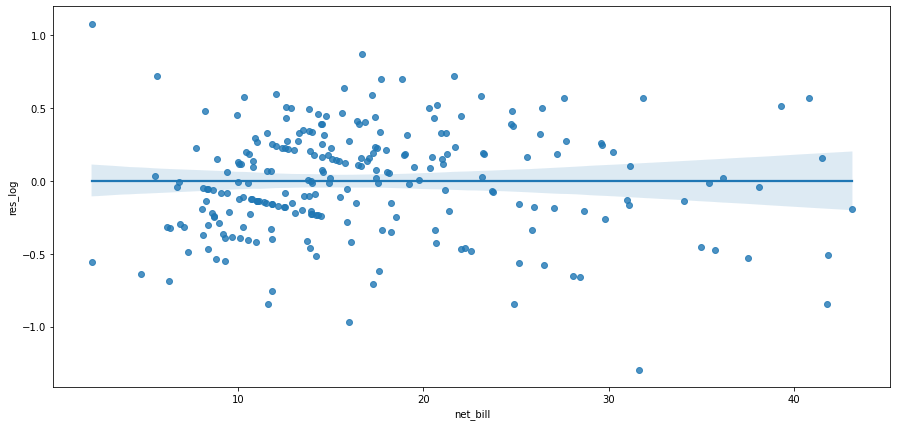

In [7]:
reg = smf.ols("np.log(tip) ~   net_bill",data=tips).fit()
tips["res_log"] = reg.resid

plt.figure(figsize=(15,7))
sns.regplot(x= "net_bill", y ="res_log",data=tips)

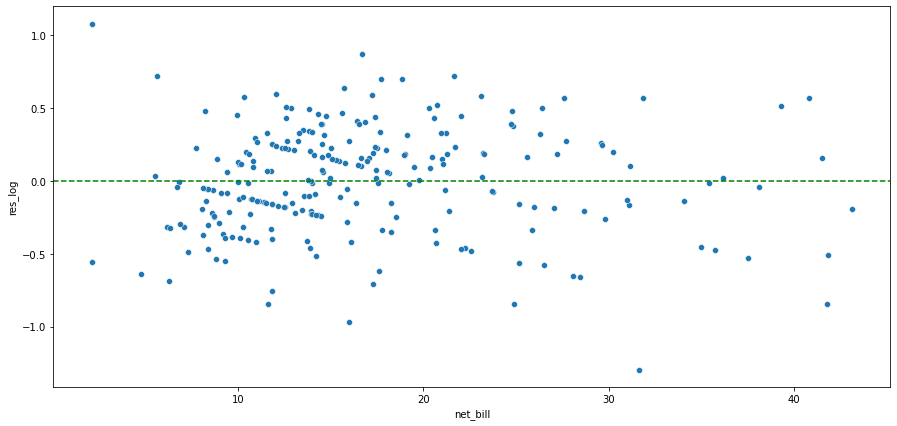

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= "net_bill", y ="res_log",data=tips)
plt.axhline(y=0,color="g",linestyle="--")

##### <font color = "black"> __teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.__

In [9]:
y, x = patsy.dmatrices("np.log(net_bill) ~ size + net_bill+ total_bill +1", tips)
modelo = sm.OLS(y,x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(net_bill)   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     638.7
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          4.53e-114
Time:                        19:01:35   Log-Likelihood:                 102.04
No. Observations:                 244   AIC:                            -196.1
Df Residuals:                     240   BIC:                            -182.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7505      0.031     55.697      0.000       1.689       1.812
size           0.0161      0.014      1.178      0.240      -0.011       0.043
net_bill       0.0583      0.010      5.712      0.000       0.038       0.078
total_bill    -0.0030      0.009     -0.319      0.750      -0.021       0.015
==============================================================================
Omnibus:                      226.374   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4912.498
Skew:                          -3.694   Prob(JB):                         0.00
Kurtosis:                      23.703   Cond. No.                         90.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Relamente alterando para net_bill o modelo passou de 0.36 para 0.88 e melhorou bastante

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
y, x = patsy.dmatrices("tip_pct ~ sex + smoker + size + net_bill + 1", tips)
modelo = sm.OLS(y,x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     7.916
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           5.23e-06
Time:                        19:01:35   Log-Likelihood:                 111.50
No. Observations:                 244   AIC:                            -213.0
Df Residuals:                     239   BIC:                            -195.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3073      0.033      9.315      0.000       0.242       0.372
sex[T.Female]    -0.0106      0.021     -0.509      0.611      -0.052       0.031
smoker[T.No]     -0.0452      0.021     -2.145      0.033      -0.087      -0.004
size              0.0251      0.013      1.909      0.057      -0.001       0.051
net_bill         -0.0082      0.002     -5.261      0.000      -0.011      -0.005
==============================================================================
Omnibus:                      462.520   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           219460.660
Skew:                          10.814   Prob(JB):                         0.00
Kurtosis:                     148.322   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y, x = patsy.dmatrices("np.log(tip_pct) ~  smoker + sex + size + np.log(net_bill) + 1", tips)
modelo = sm.OLS(y,x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     29.94
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           3.38e-20
Time:                        19:01:35   Log-Likelihood:                -89.179
No. Observations:                 244   AIC:                             188.4
Df Residuals:                     239   BIC:                             205.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3312      0.141     -2.353      0.019      -0.608      -0.054
smoker[T.No]        -0.0184      0.047     -0.390      0.697      -0.112       0.075
sex[T.Female]        0.0047      0.048      0.098      0.922      -0.089       0.098
size                 0.1112      0.029      3.790      0.000       0.053       0.169
np.log(net_bill)    -0.6099      0.058    -10.463      0.000      -0.725      -0.495
==============================================================================
Omnibus:                        6.562   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.048
Skew:                           0.086   Prob(JB):                      0.00658
Kurtosis:                       3.979   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='res_log'>

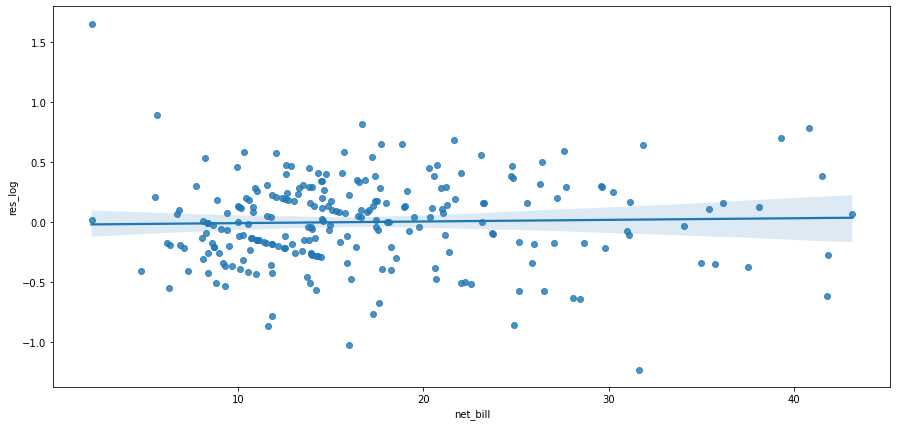

In [12]:
reg = smf.ols("np.log(tip_pct) ~   np.log(net_bill)",data=tips).fit()
tips["res_log"] = reg.resid

plt.figure(figsize=(15,7))
sns.regplot(x= "net_bill", y ="res_log",data=tips)

- Entre o modelo para prever % percentual da gorjeta e o modelo para prever a gorjeta o da gorgeta foi melhor

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [13]:
base = pd.read_csv(r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo10-DescritivaII-Análisedescritivapararespostacontínua\Profissao- Cientista de Dados_M10_support material.csv")

base.head(5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [14]:
base.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [15]:
base.shape

(15000, 16)

In [16]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [17]:
base.isnull().sum().sort_values(ascending=True)

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
qt_pessoas_residencia       0
mau                         0
renda                       0
tempo_emprego            2534
dtype: int64

In [18]:
base = base.drop("Unnamed: 0", axis=1)

In [19]:
base["tempo_emprego"] = base["tempo_emprego"].fillna("mean") 

In [20]:
base.isnull().sum()

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64

In [21]:
base_codificada = base.copy()

In [22]:
base_codificada["sexo"] = base_codificada.sexo.map({"M":1,"F":0})
base_codificada["posse_de_veiculo"] = base_codificada["posse_de_veiculo"].map({False:1,True:0})
base_codificada["posse_de_imovel"] = base_codificada["posse_de_imovel"].map({False:1,True:0})

In [23]:
base_codificada = pd.get_dummies(base_codificada,
                                 columns=["tipo_renda",
                                         "educacao",
                                         "estado_civil",
                                         "tipo_residencia"])

In [24]:
base_codificada["mau"] = base_codificada["mau"].astype(int)

In [25]:
base_codificada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       15000 non-null  object 
 1   index                          15000 non-null  int64  
 2   sexo                           15000 non-null  int64  
 3   posse_de_veiculo               15000 non-null  int64  
 4   posse_de_imovel                15000 non-null  int64  
 5   qtd_filhos                     15000 non-null  int64  
 6   idade                          15000 non-null  int64  
 7   tempo_emprego                  15000 non-null  object 
 8   qt_pessoas_residencia          15000 non-null  float64
 9   mau                            15000 non-null  int32  
 10  renda                          15000 non-null  float64
 11  tipo_renda_Assalariado         15000 non-null  uint8  
 12  tipo_renda_Bolsista            15000 non-null 

In [26]:
reg3 = smf.ols("renda ~   tempo_emprego ",data=base_codificada).fit()
tips["res_log"] = reg.resid

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     4.475
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:03:30   Log-Likelihood:            -1.4297e+05
No. Observations:               15000   AIC:                         2.911e+05
Df Residuals:                   12428   BIC:                         3.107e+05
Df Model:                        2571                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            4363.7900   3664.147      1.191      0.234   -2818.506    1.15e+04
tempo_emprego[T.0.2]                  949.3725   3886.415      0.244      0.807   -6668.602    8567.347
tempo_emprego[T.0.2438356164383561]  -954.7900   5181.886     -0.184      0.854   -1.11e+04    9202.510
tempo_emprego[T.0.2493150684931507] -2448.8920   4013.872     -0.610      0.542   -1.03e+04    5418.919
tempo_emprego[T.0.252054794520548]   5411.0500   4096.641      1.321      0.187   -2619.001    1.34e+04
tempo_emprego[T.0.2547945205479452] -1969.6300   3842.990     -0.513      0.608   -9502.485    5563.225
tempo_emprego[T.0.2602739726027397]  1795.0425   3886.415      0.462      0.644   -5822.932    9413.017
tempo_emprego[T.0.2630136986301369]  -530.9071   3792.752     -0.140      0.889   -7965.289    6903.475
tempo_emprego[T.0.2657534246575343]   450.2260   4013.872      0.112      0.911   -7417.585    8318.037
tempo_emprego[T.0.2712328767123288]  1941.5600   4013.872      0.484      0.629   -5926.251    9809.371
tempo_emprego[T.0.2767123287671233] -1316.3108   3802.465     -0.346      0.729   -8769.731    6137.110
tempo_emprego[T.0.2794520547945205] -2252.9183   3813.765     -0.591      0.555   -9728.489    5222.652
tempo_emprego[T.0.2821917808219178] -2625.3700   4487.645     -0.585      0.559   -1.14e+04    6171.110
tempo_emprego[T.0.284931506849315]   -128.6980   4013.872     -0.032      0.974   -7996.509    7739.113
tempo_emprego[T.0.2876712328767123] -1783.4050   4096.641     -0.435      0.663   -9813.456    6246.646
tempo_emprego[T.0.2931506849315069] -1914.9900   4230.993     -0.453      0.651   -1.02e+04    6378.411
tempo_emprego[T.0.2958904109589041]  -697.3136   3746.498     -0.186      0.852   -8041.029    6646.402
tempo_emprego[T.0.2986301369863013] -1618.2892   3813.765     -0.424      0.671   -9093.860    5857.281
tempo_emprego[T.0.3013698630136986] -2499.3244   3862.350     -0.647      0.518   -1.01e+04    5071.480
tempo_emprego[T.0.3178082191780822]  -438.2500   5181.886     -0.085      0.933   -1.06e+04    9719.050
tempo_emprego[T.0.3205479452054795] -2091.6067   3957.731     -0.528      0.597   -9849.373    5666.159
tempo_emprego[T.0.3232876712328767] -3072.5140   4013.872     -0.765      0.444   -1.09e+04    4795.297
tempo_emprego[T.0.326027397260274]  -2865.7100   4487.645     -0.639      0.523   -1.17e+04    5930.770
tempo_emprego[T.0.3342465753424657]  4070.1520   4013.872      1.014      0.311   -3797.659    1.19e+04
tempo_emprego[T.0.3397260273972603] -2647.7900   5181.886     -0.511      0.609   -1.28e+04    7509.510
tempo_emprego[T.0.3424657534246575] -1843.7600   5181.886     -0.356      0.722    -1.2e+04    8313.540
tempo_emprego[T.0.3452054794520548]  -733.5081   3776.916     -0.19

In [37]:
reg4 = smf.ols("renda ~   tempo_emprego + posse_de_veiculo + posse_de_imovel ",data=base_codificada).fit()

reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     4.527
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:19:15   Log-Likelihood:            -1.4292e+05
No. Observations:               15000   AIC:                         2.910e+05
Df Residuals:                   12426   BIC:                         3.106e+05
Df Model:                        2573                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            5412.6835   3656.139      1.480      0.139   -1753.916    1.26e+04
tempo_emprego[T.0.2]                  407.3103   3876.532      0.105      0.916   -7191.293    8005.914
tempo_emprego[T.0.2438356164383561] -1765.7200   5167.589     -0.342      0.733   -1.19e+04    8363.554
tempo_emprego[T.0.2493150684931507] -3497.7855   4004.600     -0.873      0.382   -1.13e+04    4351.850
tempo_emprego[T.0.252054794520548]   5173.0865   4085.885      1.266      0.206   -2835.881    1.32e+04
tempo_emprego[T.0.2547945205479452] -2531.9655   3833.277     -0.661      0.509      -1e+04    4981.851
tempo_emprego[T.0.2602739726027397]  1532.8191   3875.176      0.396      0.692   -6063.127    9128.765
tempo_emprego[T.0.2630136986301369]  -656.8203   3781.746     -0.174      0.862   -8069.628    6755.987
tempo_emprego[T.0.2657534246575343]    78.2613   4002.340      0.020      0.984   -7766.945    7923.468
tempo_emprego[T.0.2712328767123288]  1245.2233   4002.903      0.311      0.756   -6601.087    9091.534
tempo_emprego[T.0.2767123287671233] -2284.5202   3793.561     -0.602      0.547   -9720.488    5151.448
tempo_emprego[T.0.2794520547945205] -2721.5313   3803.670     -0.716      0.474   -1.02e+04    4734.250
tempo_emprego[T.0.2821917808219178] -3436.3000   4475.524     -0.768      0.443   -1.22e+04    5336.420
tempo_emprego[T.0.284931506849315]   -366.6615   4003.385     -0.092      0.927   -8213.915    7480.592
tempo_emprego[T.0.2876712328767123] -2188.8700   4084.910     -0.536      0.592   -1.02e+04    5818.186
tempo_emprego[T.0.2931506849315069] -2423.2635   4219.941     -0.574      0.566   -1.07e+04    5848.475
tempo_emprego[T.0.2958904109589041] -1226.1713   3736.072     -0.328      0.743   -8549.452    6097.109
tempo_emprego[T.0.2986301369863013] -1717.4406   3802.813     -0.452      0.652   -9171.544    5736.663
tempo_emprego[T.0.3013698630136986] -2758.8523   3851.233     -0.716      0.474   -1.03e+04    4790.161
tempo_emprego[T.0.3178082191780822] -1249.1800   5167.589     -0.242      0.809   -1.14e+04    8880.094
tempo_emprego[T.0.3205479452054795] -3140.5002   3948.659     -0.795      0.426   -1.09e+04    4599.483
tempo_emprego[T.0.3232876712328767] -3072.5140   4002.098     -0.768      0.443   -1.09e+04    4772.218
tempo_emprego[T.0.326027397260274]  -3676.6400   4475.524     -0.821      0.411   -1.24e+04    5096.080
tempo_emprego[T.0.3342465753424657]  3345.6305   4003.834      0.836      0.403   -4502.505    1.12e+04
tempo_emprego[T.0.3397260273972603] -2647.7900   5166.686     -0.512      0.608   -1.28e+04    7479.716
tempo_emprego[T.0.3424657534246575] -2081.7235   5167.683     -0.403      0.687   -1.22e+04    8047.736
tempo_emprego[T.0.3452054794520548] -1365.3861   3766.568     -0.36

In [38]:
reg5 = smf.ols("renda ~  posse_de_veiculo +  posse_de_imovel ",data=base_codificada).fit()


reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     37.44
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           6.05e-17
Time:                        19:19:18   Log-Likelihood:            -1.4785e+05
No. Observations:               15000   AIC:                         2.957e+05
Df Residuals:                   14997   BIC:                         2.957e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5094.6690     66.225     76.930      0.000    4964.861    5224.478
posse_de_veiculo  -606.3747     77.344     -7.840      0.000    -757.979    -454.771
posse_de_imovel   -303.3559     80.319     -3.777      0.000    -460.791    -145.920
==============================================================================
Omnibus:                    12993.818   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           598445.734
Skew:                           3.982   Prob(JB):                         0.00
Kurtosis:                      32.901   Cond. No.                         3.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
reg6 = smf.ols("np.log(renda) ~   tempo_emprego + posse_de_veiculo + posse_de_imovel ",data=base_codificada).fit()
base_codificada["res_log"] = reg.resid

reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     3.409
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:10:04   Log-Likelihood:                -13883.
No. Observations:               15000   AIC:                         3.291e+04
Df Residuals:                   12426   BIC:                         5.252e+04
Df Model:                        2573                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               8.6178      0.671     12.837      0.000       7.302       9.934
tempo_emprego[T.0.2]                   -0.3018      0.712     -0.424      0.672      -1.697       1.093
tempo_emprego[T.0.2438356164383561]    -0.4120      0.949     -0.434      0.664      -2.272       1.448
tempo_emprego[T.0.2493150684931507]    -1.1300      0.735     -1.537      0.124      -2.571       0.311
tempo_emprego[T.0.252054794520548]      0.7349      0.750      0.980      0.327      -0.736       2.205
tempo_emprego[T.0.2547945205479452]    -0.8812      0.704     -1.252      0.211      -2.261       0.498
tempo_emprego[T.0.2602739726027397]    -0.1535      0.712     -0.216      0.829      -1.548       1.241
tempo_emprego[T.0.2630136986301369]    -0.6992      0.694     -1.007      0.314      -2.060       0.662
tempo_emprego[T.0.2657534246575343]    -0.0879      0.735     -0.120      0.905      -1.528       1.353
tempo_emprego[T.0.2712328767123288]     0.0623      0.735      0.085      0.932      -1.378       1.503
tempo_emprego[T.0.2767123287671233]    -0.8465      0.697     -1.215      0.224      -2.212       0.519
tempo_emprego[T.0.2794520547945205]    -1.0068      0.698     -1.442      0.149      -2.376       0.362
tempo_emprego[T.0.2821917808219178]    -1.0855      0.822     -1.321      0.187      -2.696       0.525
tempo_emprego[T.0.284931506849315]     -0.5118      0.735     -0.696      0.486      -1.953       0.929
tempo_emprego[T.0.2876712328767123]    -0.7554      0.750     -1.007      0.314      -2.226       0.715
tempo_emprego[T.0.2931506849315069]    -0.7113      0.775     -0.918      0.359      -2.230       0.808
tempo_emprego[T.0.2958904109589041]    -0.6040      0.686     -0.881      0.379      -1.949       0.741
tempo_emprego[T.0.2986301369863013]    -0.6109      0.698     -0.875      0.382      -1.980       0.758
tempo_emprego[T.0.3013698630136986]    -0.9906      0.707     -1.401      0.161      -2.377       0.395
tempo_emprego[T.0.3178082191780822]    -0.2709      0.949     -0.286      0.775      -2.131       1.589
tempo_emprego[T.0.3205479452054795]    -1.1180      0.725     -1.542      0.123      -2.539       0.303
tempo_emprego[T.0.3232876712328767]    -1.2882      0.735     -1.753      0.080      -2.729       0.152
tempo_emprego[T.0.326027397260274]     -1.2673      0.822     -1.542      0.123      -2.878       0.343
tempo_emprego[T.0.3342465753424657]    -0.3877      0.735     -0.527      0.598      -1.829       1.053
tempo_emprego[T.0.3397260273972603]    -0.9333      0.949     -0.984      0.325      -2.793       0.926
tempo_emprego[T.0.3424657534246575]    -0.6207      0.949     -0.654      0.513      -2.481       1.239
tempo_emprego[T.0.3452054794520548]    -0.5353      0.692     -0.77

<AxesSubplot:xlabel='renda', ylabel='res_log'>

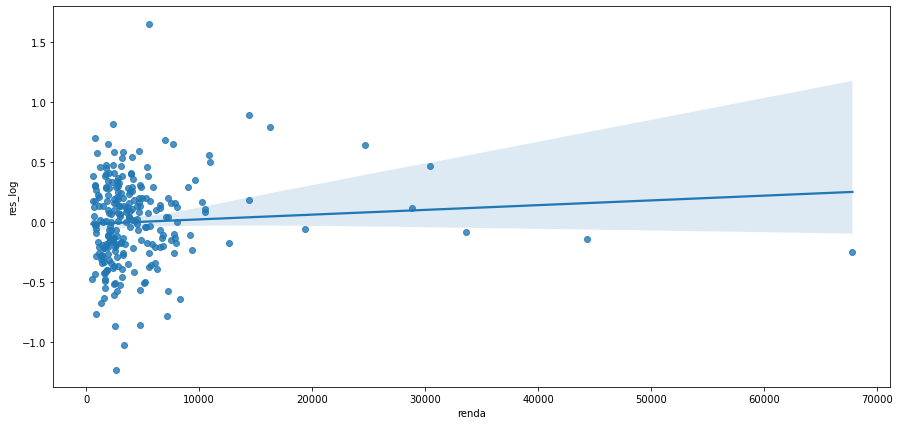

In [39]:
plt.figure(figsize=(15,7))
sns.regplot(x= "renda", y ="res_log",data=base_codificada)

<AxesSubplot:xlabel='renda', ylabel='res_log'>

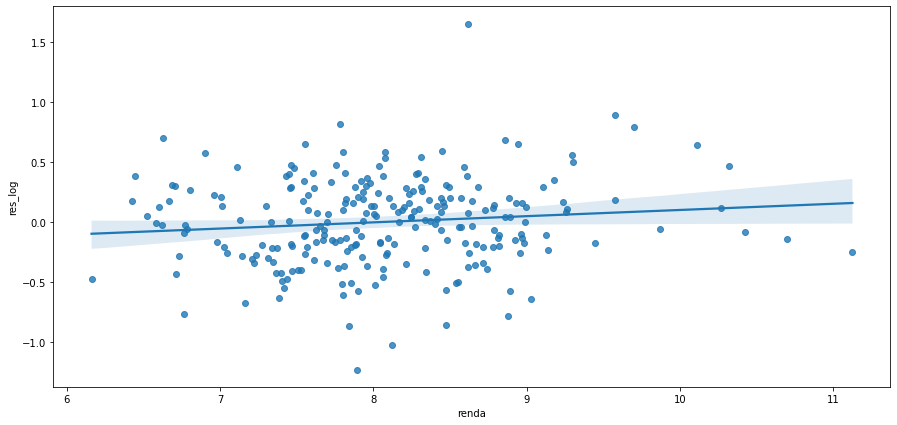

In [40]:
plt.figure(figsize=(15,7))
sns.regplot(x= np.log(base_codificada["renda"]), y ="res_log",data=base_codificada)